# Constants

In [50]:
NUMBER_OF_PROCESSORS = 20
CLUSTERS_WIDTH = 2
FIRST_ATOMS_TO_IGNORE = 1

# Imports

In [2]:
import os
from sklearn import cluster
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

from scripts import obtain_water_data_from, get_reference_coords
from scripts import get_density, get_matchs, fulfill_condition
from scripts import add_matchs_to_reports, write_centroids, get_metric
from scripts import get_ordered_matchs

#  Bromodomain with water C:1

In [ ]:
WATER_SIMULATION_IDS = [['B', 1, ' OW '], ['C', 1, ' OW ']]
WATER_REFERENCE_IDS = [['C', 1, ' OW ']]

In [3]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/4STD/with_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [4]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 40 epochs and 5080 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [5]:
ref_coords = get_reference_coords('4STD_original.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

In [6]:
# Add alternative position for water C:1 to reference coords
ref_coords.append(np.array([102.29, 90.85, 27.23]))

## Clustering

In [7]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

In [8]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

In [9]:
print(reference_clusters)

[2, 3]


## Clustering analysis

In [10]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [11]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

## Display results

In [12]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
        0        0.291
        1        0.304
 *      2        0.105
 *      3        0.114
        4        0.088
        5        0.082
        6        0.002
        7        0.005
        8        0.000
        9        0.005
       10        0.003
       11        0.000
       12        0.000
       13        0.000


In [13]:
write_centroids(estimator, densities, '/home/municoy/LocalResults/waters/4STD/with_water/PDB/4STD_centroids.pdb', normalize=False)

In [14]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Asn123_distance')
rmsds = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='RMSD')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters, FIRST_ATOMS_TO_IGNORE)
add_matchs_to_reports(list_of_reports, matchs, FIRST_ATOMS_TO_IGNORE)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

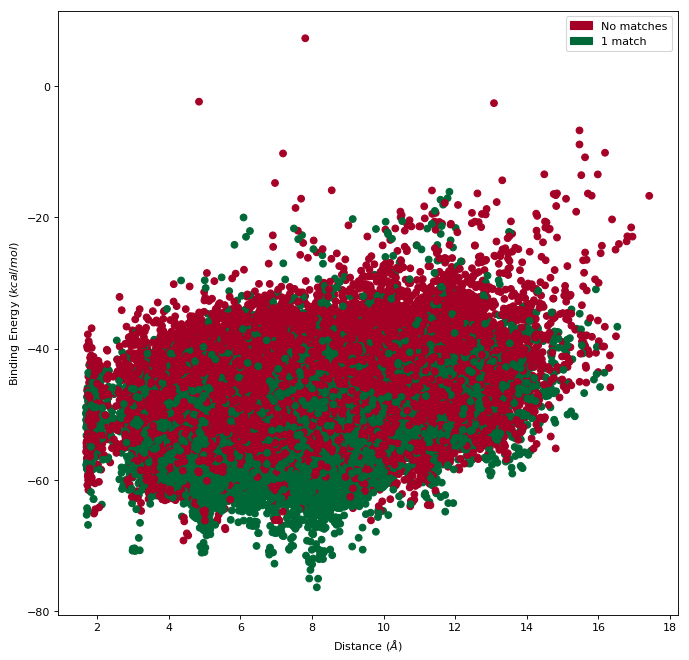

In [15]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

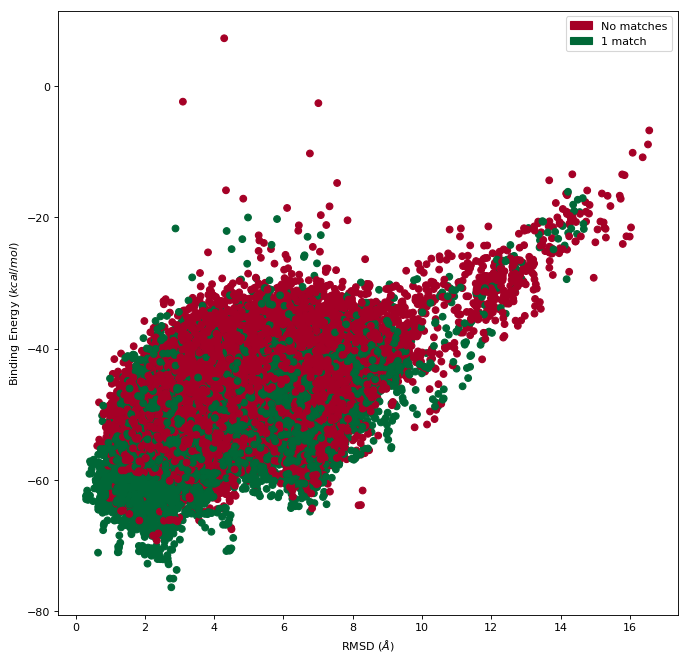

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('RMSD (' + r'$\AA$' + ')')
sc = ax.scatter(rmsds, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_RMSD.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

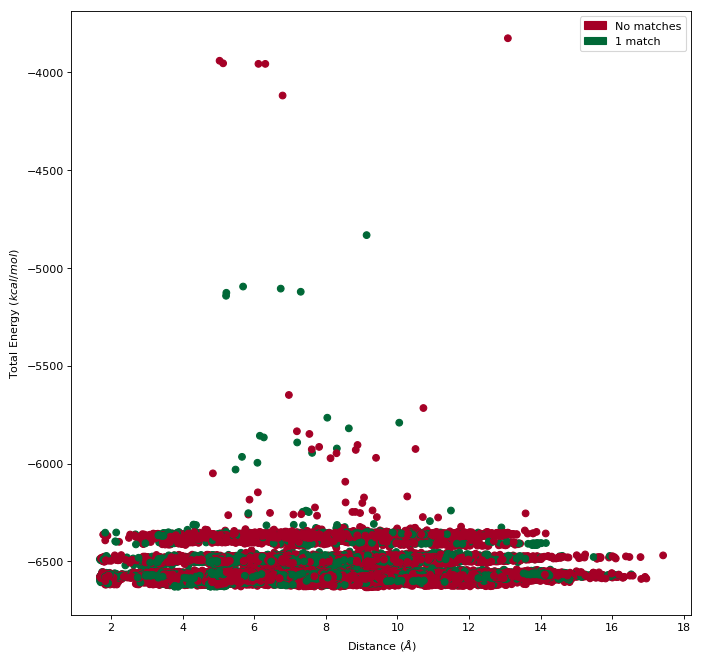

In [17]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

#  Bromodomain with water C:1 and B:1

In [30]:
WATER_SIMULATION_IDS = [['B', 1, ' OW '], ['C', 1, ' OW ']]
WATER_REFERENCE_IDS = [['B', 1, ' OW '], ['C', 1, ' OW ']]

In [19]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/4STD/with_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [20]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 40 epochs and 5080 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [31]:
ref_coords = get_reference_coords('4STD_original.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

In [32]:
# Add alternative position for water C:1 to reference coords
ref_coords.append(np.array([102.29, 90.85, 27.23]))

## Clustering

In [23]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

In [33]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

In [35]:
print(reference_clusters)

[0, 2, 3]


## Clustering analysis

In [36]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [37]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

## Display results

In [38]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.291
        1        0.304
 *      2        0.105
 *      3        0.114
        4        0.088
        5        0.082
        6        0.002
        7        0.005
        8        0.000
        9        0.005
       10        0.003
       11        0.000
       12        0.000
       13        0.000


In [42]:
write_centroids(estimator, densities, '/home/municoy/LocalResults/waters/4STD/with_water/PDB/4STD_centroids.pdb', normalize=False)

In [43]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Asn123_distance')
rmsds = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='RMSD')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters, FIRST_ATOMS_TO_IGNORE)
add_matchs_to_reports(list_of_reports, matchs, FIRST_ATOMS_TO_IGNORE)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

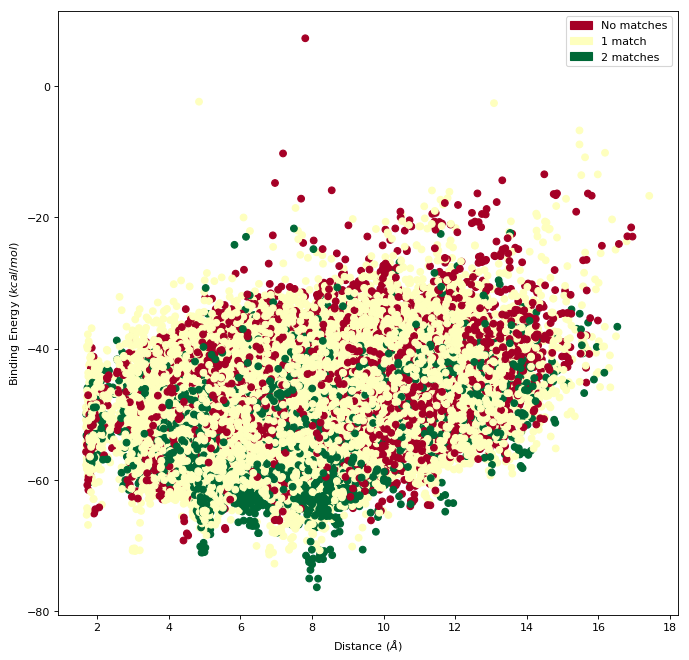

In [44]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

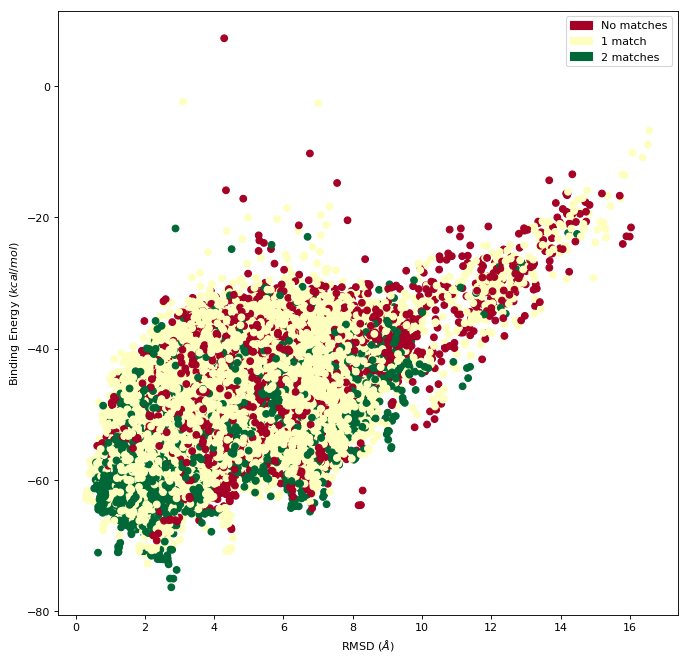

In [45]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('RMSD (' + r'$\AA$' + ')')
sc = ax.scatter(rmsds, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_RMSD.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

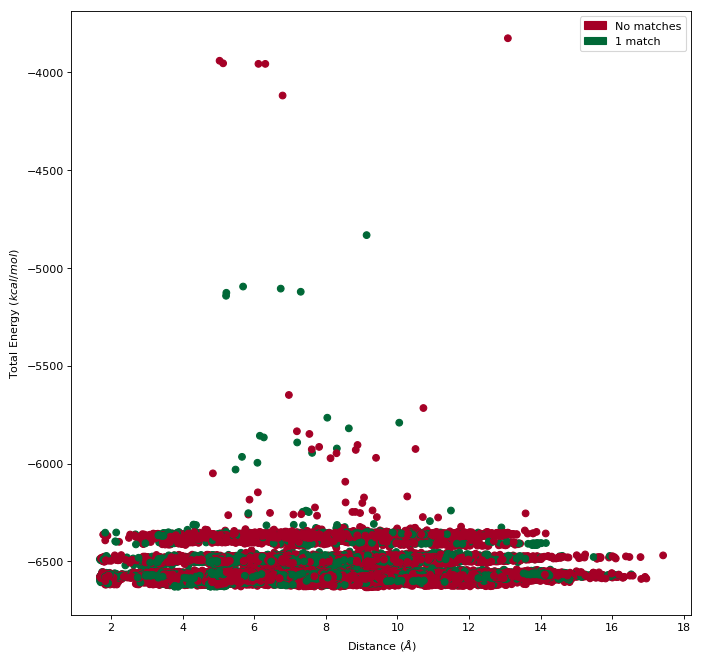

In [17]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

#  Bromodomain without water

In [46]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/4STD/without_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data

In [49]:
_, list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 40 epochs and 5080 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


In [54]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Asn123_distance')
rmsds = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='RMSD')
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn

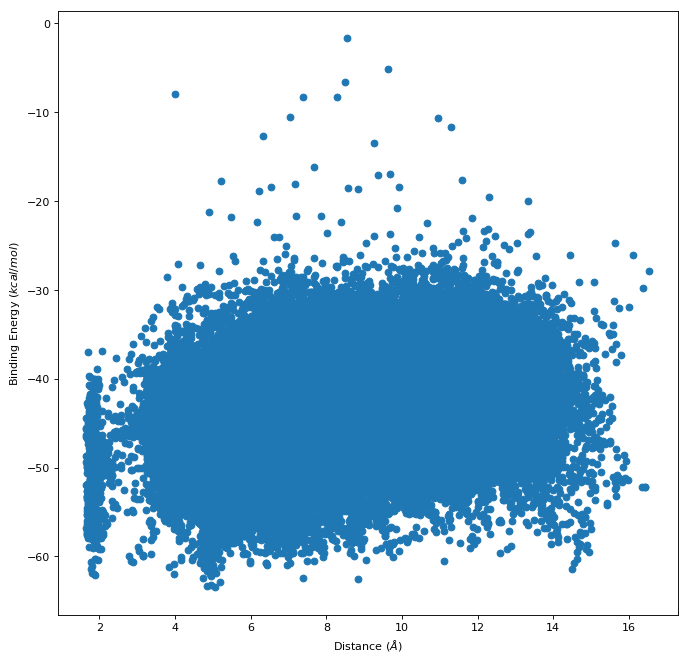

In [55]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, cmap=cmap, norm=norm)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

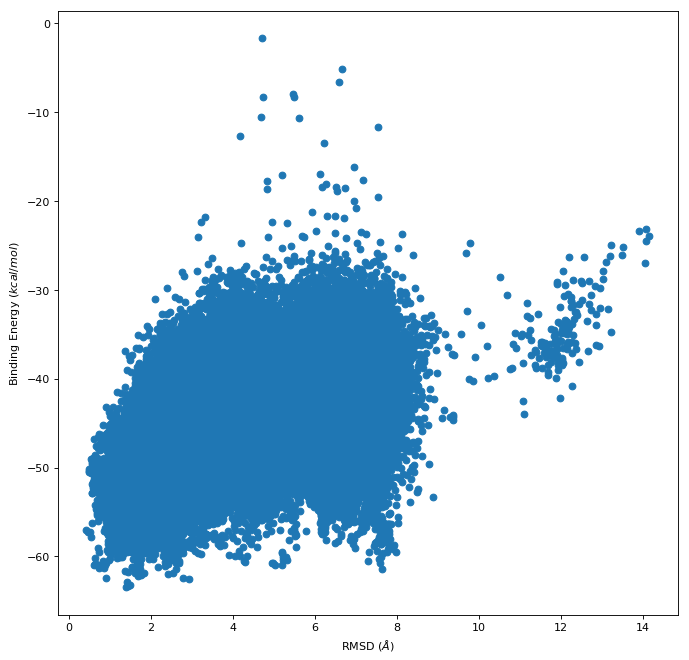

In [57]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('RMSD (' + r'$\AA$' + ')')
sc = ax.scatter(rmsds, energies, cmap=cmap, norm=norm)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, cmap=cmap, norm=norm)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

# TODO
- Run a simulation again minimizing at first (MN4 simulations with 40 iterations x 20 pele steps)

# Summary
- Good results were obtained with the simulation on Nord3 cluster of 20 adaptive iterations of 20 pele steps each
- Lowest minimum at low RMSD and distance contains either one or the two water molecules laying on crystallographic positions.
- Clustering results show high densities in locations where hydroxyl groups from the ligand or water molecules in the crystallographic structure are located.